# Nobel Prize Dataframe

In this case we have a dataset where we have the winners of the different Nobel prizes from *1901* to *2016*.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

nobel = pd.read_csv('/content/sample_data/nobel.csv')

nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## Knowing the set in a general way

The first thing we will do is to answer the following questions that will give us general information about the set:

- How many awards are recorded in this set?
- How many awards have been won by men and women?
- Which countries have won the most awards?

In [3]:
display(len(nobel))

display(nobel['sex'].value_counts())

nobel['birth_country'].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

## Winning percentage of USA by decade

 Knowing that **USA** is the country that has won the most, we will know the winning percentage they have had per decade.

In [4]:
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

prop_usa_winners

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


We see that it is from *1930* that **USA** starts to have a much higher percentage than the other countries. It is easier to see this if we graph it.

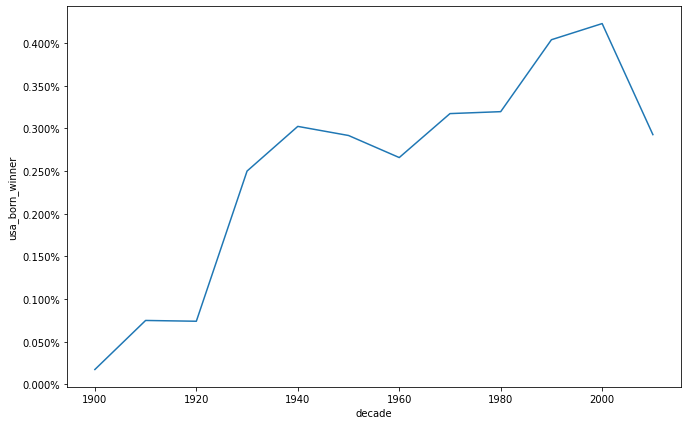

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

ax = sns.lineplot(
    x='decade',
    y='usa_born_winner',
    data=prop_usa_winners
)

from matplotlib.ticker import PercentFormatter

ax.yaxis.set_major_formatter(PercentFormatter())

## Winning percentage between male and female.

Knowing the following data:

|Gender|Winners|
|---|---|
|Male|836|
|Female|49|
|NA|26|

The following question may arise

### What is the winning percentage between male and female in the different categories?

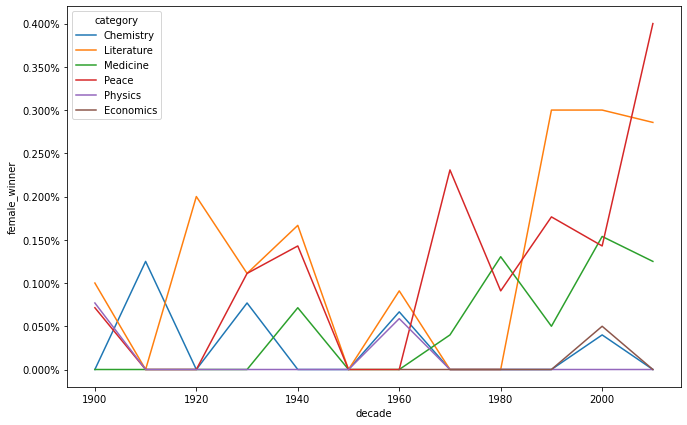

In [6]:

nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

ax = sns.lineplot(
    x='decade',
    y='female_winner',
    data=prop_female_winners,
    hue='category'
)

ax.yaxis.set_major_formatter(PercentFormatter())

Analyzing the graph we can conclude the following:

- The categories where the fewest women have won are as follows:
  - Physics
  - Chemistry
  - Economics
- The categories where the most women have won are the following:
  - Literature
  - Medicine
  - Peace

## Age where there are more winners

We want to know the age range in which there are more winners.

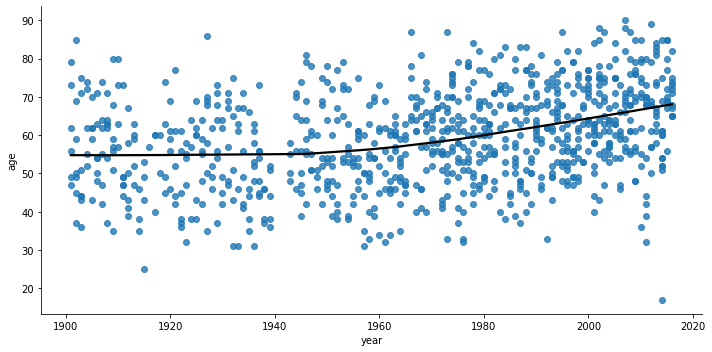

In [8]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

sns.lmplot(
    x='year',
    y='age',
    data=nobel,
    lowess=True,
    aspect=2,
    line_kws={'color': 'black'}
)

We see that as the years go by the winners are older compared to previous years, this may be because now the areas of study involve more knowledge that can be gained over the years.

## Age range of the winners in the different categories

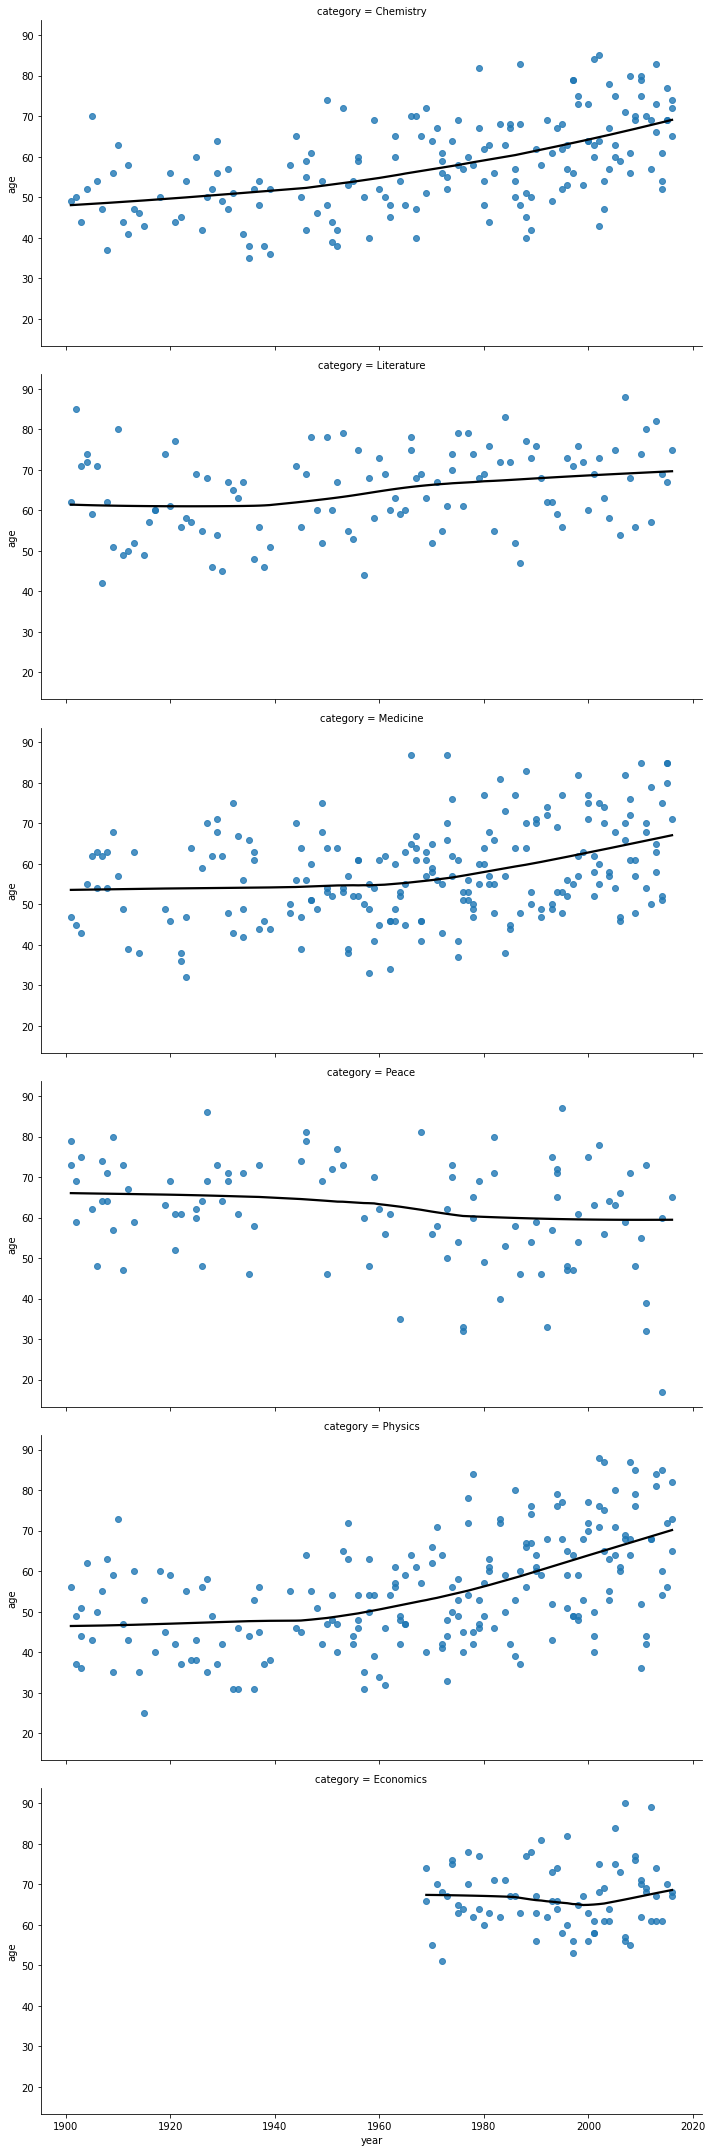

In [9]:
sns.lmplot(
    x='year',
    y='age',
    data=nobel,
    lowess=True,
    aspect=2,
    line_kws={'color': 'black'},
    row='category'
)

While in the *Peace* category the age of the winners has been decreasing in the other categories it has been different as the age of the winners has been increasing.

## Youngest and oldest winner

In [10]:
display(nobel.nlargest(1, 'age'))

nobel.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


Finally we get the following data:

- The oldest winner *Leonid Hurwicz* was in the *Economy* category.
- The youngest winner *Malala Yousafzai* was in the category *Peace*.